In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
titanic_df = pd.read_csv('../data/titanic_train.csv', encoding='utf-8')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 데이터 정보 확인(구조, 의미 확인)
titanic_df.info()
# 카테고리화 가능한 문자열 컬럼 (sex, cabin)
# null처리 Age, Cabin, Embarked (null제거)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Null 처리 -> DataFrame -> fillna()
# Age, Cabin, Embarked

# null 개수 파악
np.sum(titanic_df['Age'].isnull()),\
np.sum(titanic_df['Cabin'].isnull()),\
np.sum(titanic_df['Embarked'].isnull())

(177, 687, 2)

In [5]:
# series에도 sum() 메소드가 있다!!
titanic_df['Age'].isnull().sum()

177

In [6]:
# 데이터 분석
titanic_df['Sex'].value_counts()
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
# 결측치를 평균값으로 다넣어버림
titanic_df['Age'].fillna(
      titanic_df['Age'].mean()
    , inplace = True
)
# 적용 검증
titanic_df['Age'].isnull().sum()

0

In [8]:
# Cabin fillna
titanic_df['Cabin'].fillna(
     'N'
    , inplace = True
)
titanic_df['Cabin'].notnull().sum()

891

In [9]:
titanic_df['Embarked'].fillna(
      'N'
    , inplace = True
)
titanic_df['Embarked'].notnull().sum()

891

In [10]:
titanic_df['Cabin'][:5]

0       N
1     C85
2       N
3    C123
4       N
Name: Cabin, dtype: object

In [11]:
# Cabin 의 구역 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
# titanic_df['Cabin'] = str(titanic_df['Cabin'])[:1] <-- 이렇게도 가능
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [12]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


### 시각화

In [26]:
# 성별 생존 여부에 대한 분포(개수)
# groupby -> count
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

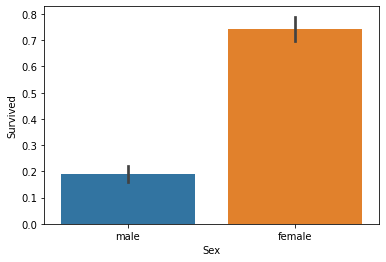

In [29]:
# barplot
sns.barplot(
      x = 'Sex'
    , y = 'Survived'
    , data = titanic_df
)

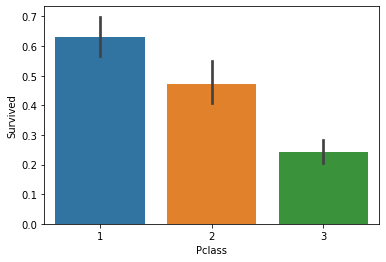

In [30]:
sns.barplot(
      x = 'Pclass'
    , y = 'Survived'
    , data = titanic_df
)

In [31]:
# 입력한 나이값을 가지고 구간값을 대입
def get_cate(age):
    cate = ''
    if age <= -1: cate='Unknown'
    elif age <= 5 : cate='Baby'
    elif age <= 12 : cate ='Child'
    elif age <= 18 : cate ='Teenager'
    elif age <= 25 : cate ='Student'
    elif age <= 35 : cate ='Young Adult'
    elif age <= 60 : cate ='Adult'
    else : cate ='Elderly'
        
    return cate

In [33]:
plt.figure(figsize=(10,6))

group_names = \
['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult', 'Elderly']

<Figure size 720x432 with 0 Axes>

In [34]:
titanic_df['Age_cate'] = \
titanic_df['Age'].apply(lambda x : get_cate(x))

In [36]:
titanic_df[['Age','Age_cate']][:5]

,Age,Age_cate
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


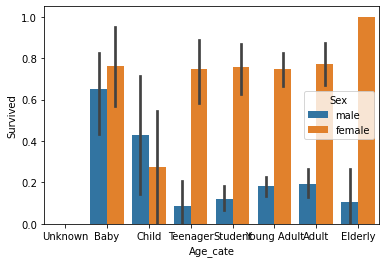

In [41]:
sns.barplot(
      x='Age_cate'
    , y='Survived'
    , hue='Sex'
    , data=titanic_df
    , order=group_names
)

### 인코딩(Cabin, Sex, Embarked)

In [42]:
from sklearn import preprocessing

In [43]:
def encode_features(dataDF):
    '''dataDF : 입력 데이터프레임'''
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cate
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [44]:
# Null 처리 함수 (Age, Cabin, Embarked, Fare)
# DataFrame object => fillna() method 존재
# def fillna(df): -> 단어는 되도록 다르게
def fillna_df(df):
    '''Age => mean()'''
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    
    return df

In [47]:
# 불필요한 컬럼 제거 function
def drop_features(df):
    df.drop(
              ['PassengerId','Name','Ticket']  # name,ticket은 실제로는 유의미
            , axis=1
            , inplace = True
    )
    return df

In [58]:
# Cabin, Sex, Embarked 레이블 인코딩 함수
# Cabin : C85 -> C -> 레이블 인코딩 진행 필요
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # Cabin : C85 -> C
    features=['Cabin','Sex','Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df
    

In [59]:
# 앞에서 선언한 함수를  다 적용하는 함수 (별로 좋은 방법은 아님)
def transform_features(df):
    df = fillna_df(df) # Null 채우기
    df = drop_features(df) # 필요없는 컬럼 삭제
    df = format_features(df) # 인코딩
    return df

### 머신러닝 알고리즘 실행

In [61]:
# 전체 원본 데이터
titanic_df = pd.read_csv('../data/titanic_train.csv')

# 답 추출
y_tit_df = titanic_df['Survived']

# 답을 뺀 데이터 추출
X_tit_df = titanic_df.drop(['Survived'], axis = 1)

# 데이터 전처리(Null, 컬럼삭제, 인코딩)
X_tit_df = transform_features(X_tit_df)

X_tit_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [62]:
# 모델 생성
# 1. 학습데이터, 테스트데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(
      X_tit_df  # 분리할 데이터
    , y_tit_df  # 분리할 답
    , test_size = 0.2  # 테스트 데이터 크기
    , random_state = 11
)

In [66]:
# 머신러닝 알고리즘에 적용 
# 지도학습 (답이 존재), 분류(Survived or Dead)
# DecisionTreeClassifier
# RandomForestClassifier
# LogisticRegression

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# 분류문제 일차적인 평가지표 -> 정확도
from sklearn.metrics import accuracy_score

# 위 알고리즘의 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 학습 진행 => 학습한 모델 생성
# 1. dt_clf 정확도 출력
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test) # 테스트데이터 입력 -> 예측값 출력
print('dt_clf 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 2. rf_clf 정확도 출력
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('rf_clf 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# 3. lr_clf 정확도 출력
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('lr_clf 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

dt_clf 정확도: 0.7877
rf_clf 정확도: 0.8547
lr_clf 정확도: 0.8492


C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
# 머신러닝 알고리즘에 적용 = KFold
# 지도학습 (답이 존재), 분류(Survived or Dead)
# DecisionTreeClassifier
# RandomForestClassifier
# LogisticRegression

In [ ]:
# 머신러닝 알고리즘에 적용 = cross_val_score
# 지도학습 (답이 존재), 분류(Survived or Dead)
# DecisionTreeClassifier
# RandomForestClassifier
# LogisticRegression
from sklearn.model_selection import cross_val_score


scores = cross_val_score(
      lr_clf # 적용할 알고리즘
    , X_tit_df # 학습할 데이터
    , y_tit_df # 학습할 정답
    , cv = 5 # KFold (홀수로 하는것이 좋음)
)

for n, accu in enumerate(scores):
    out_str = '교차컴증 {0} 정확도 : {1:.4f}'
    print(out_str.format(n,accu))

print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

In [74]:
# 머신러닝 알고리즘에 적용 = cross_val_score
# 지도학습 (답이 존재), 분류(Survived or Dead)
# DecisionTreeClassifier
# RandomForestClassifier
# LogisticRegression
from sklearn.model_selection import cross_val_score
al_name = [dt_clf, rf_clf, lr_clf]

for al in al_name:
    scores = cross_val_score(
          al # 적용할 알고리즘
        , X_tit_df # 학습할 데이터
        , y_tit_df # 학습할 정답
        , cv = 5 # KFold (홀수로 하는것이 좋음)
    )

    for n, accu in enumerate(scores):
        out_str = '교차컴증 {0} 정확도 : {1:.4f}'
        print(out_str.format(n,accu))

    print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차컴증 0 정확도 : 0.7430
교차컴증 1 정확도 : 0.7753
교차컴증 2 정확도 : 0.7921
교차컴증 3 정확도 : 0.7865
교차컴증 4 정확도 : 0.8427
평균 정확도 : 0.7879
교차컴증 0 정확도 : 0.7933
교차컴증 1 정확도 : 0.7978
교차컴증 2 정확도 : 0.8483
교차컴증 3 정확도 : 0.7640
교차컴증 4 정확도 : 0.8652
평균 정확도 : 0.8137
교차컴증 0 정확도 : 0.7989
교차컴증 1 정확도 : 0.7697
교차컴증 2 정확도 : 0.7809
교차컴증 3 정확도 : 0.7753
교차컴증 4 정확도 : 0.7978
평균 정확도 : 0.7845


C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [81]:
# 머신러닝 알고리즘에 적용 = GridSearchCV : 베스트 파라미터 찾기
# 지도학습 (답이 존재), 분류(Survived or Dead)
# DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

grid_param = {
      'max_depth' : [2,3,5,10] # 4개
    , 'min_samples_split' : [2,3,5] #3개
    , 'min_samples_leaf' : [1,5,8] #3개  --------------> 4 x 3 x 3 = 36번
}
# 180번 학습시켜서 베스트 파라미터 찾기
grid_dclf = GridSearchCV(
      dt_clf # 적용할 알고리즘 / rf_clf 적용 가능
    , param_grid=grid_param # 적용할 파라미터 딕셔너리
    , scoring='accuracy'# 적용할 평가지표 =  정확도
    , cv=5
)

# 베스트 찾기
grid_dclf.fit(X_train, y_train)
print('베스트 파라미터 : ', grid_dclf.best_params_)
print('베스트 정확도 : ', grid_dclf.best_score_)

# 여기까지 진행된 부분은 베스트를 찾기 위한 것이다.

# 베스트 모델 => 예측 + 평가
best_dclf = grid_dclf.best_estimator_ # 베스트 모델

# 테스트 데이터 입력해서 예측값을 추출
dpred = best_dclf.predict(X_test) # 테스트 데이터

# 예측값(dpred)과 원래 답(y_test)을 비교 => 정확도 추출
accu = accuracy_score(y_test, dpred)

print('최종 정확도 : {0:.4f}'.format(accu))

베스트 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
베스트 정확도 :  0.7991825076332119
최종 정확도 : 0.8715


In [77]:
lr_clf?